# WEB SCRAPING AND API
## Jupyter notebook prepared by Thatayotlhe Dinona

#### Data for this project was obtained via the website https://www.ebooks.com/ and was used for learning and personal purpose only. fair usage

In [217]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [219]:
headers = {
    'sec-ch-ua-platform': '"Windows"',
    'Referer': 'https://www.ebooks.com/en-us/category/religion/5479/',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36 Edg/132.0.0.0',
    'sec-ch-ua': '"Not A(Brand";v="8", "Chromium";v="132", "Microsoft Edge";v="132"',
    'Content-Type': 'application/json',
    'sec-ch-ua-mobile': '?0',
}

params = {
    'CountryCode': 'US',
    'bisacId': '5479',
}

response = requests.get('https://www.ebooks.com/api/search/bisac/', params=params, headers=headers)

In [221]:
response.status_code

200

In [223]:
type(response.json())

dict

In [225]:
response.json().keys()

dict_keys(['search_term', 'start_record', 'total_results', 'books', 'pages', 'previous_page', 'next_page'])

In [227]:
len(response.json()['books'])

10

In [229]:
results= response.json()['books']

#### DATA TRANSFORMATION

In [231]:
df=pd.json_normalize(results)

In [233]:
df.columns

Index(['id', 'book_url', 'image_url', 'image_alt_tag', 'src_set',
       'image_width', 'image_height', 'title', 'edition', 'subtitle',
       'authors', 'num_authors', 'series', 'series_number', 'has_series',
       'series_url', 'publisher', 'publication_year', 'price', 'description',
       'is_preorder', 'is_available', 'preorder_url', 'add_to_cart_url',
       'currency_symbol', 'price_number', 'on_sale_date',
       'short_publication_date'],
      dtype='object')

In [235]:
df = df[['title', 'subtitle', 'authors', 'num_authors', 'publisher', 'publication_year', 'price', 'short_publication_date']]


In [237]:
df.head(3)

,title,subtitle,authors,num_authors,publisher,publication_year,price,short_publication_date
0,Religion Matters,,"[{'name': 'Stephen Prothero', 'normalised_name...",1,W. W. Norton & Company,2024,US$41.44,July 2024
1,Preparing for Marriage,,"[{'name': 'Dennis Rainey', 'normalised_name': ...",1,Baker Publishing Group,2010,US$14.99,December 2010
2,Practicing the Way,Be with Jesus. Become like him. Do as he did.,"[{'name': 'John Mark Comer', 'normalised_name'...",1,PRH Christian Publishing,2024,US$1.99,January 2024


In [239]:
df.to_csv('books.csv',index=False)

##### LOADING THE DATASET

In [241]:
def load_data(filepath):
    import os
    _, file_ext = os.path.splitext(filepath)
    
    if file_ext == '.csv':
        return pd.read_csv(filepath)
    elif file_ext == '.json':
        return pd.read_json(filepath)
    elif file_ext == '.xlsx':
        return pd.read_excel(filepath)
    else:
        raise ValueError("Unsupported file format")

In [243]:
df = load_data('books.csv')

##### DATA CLEANING

###### Replacing and stripping strings to extract useful values

In [245]:
df['authors'] = df['authors'].str.strip('123[{')
df['price'] = df['price'].str.replace('US$','')
df[['Useless column','First_Authors','Second_authors']] = df['authors'].str.split(':',n=2,expand=True)
df['month_name'] = df['short_publication_date'].str.split().str[0]
df['First_Authors']= df['First_Authors'].str.strip().str.replace("'"," ")
df[['Normalised','authors']] = df['First_Authors'].str.split(',',n=1,expand=True)


###### Dropping irrelevant or redundant columns

In [249]:
df.drop(columns=['Useless column'],inplace=True)
df.drop(columns=['authors'],inplace=True)
df.drop(columns=['Second_authors'],inplace=True)
df.drop(columns=['short_publication_date'],inplace=True)
df.drop(columns=['First_Authors'],inplace=True)
df.drop(columns=['Normalised'],inplace=True)

###### Data type conversion

In [253]:
df['price'] = df['price'].astype(float)
pd.to_datetime(df['publication_year'], format='%Y')

###### Handling missing values

In [ ]:
df= df.fillna(value='')

##### DATA VISUALISATION

In [255]:
price_by_book=df.groupby('title')['price'].mean().sort_values()

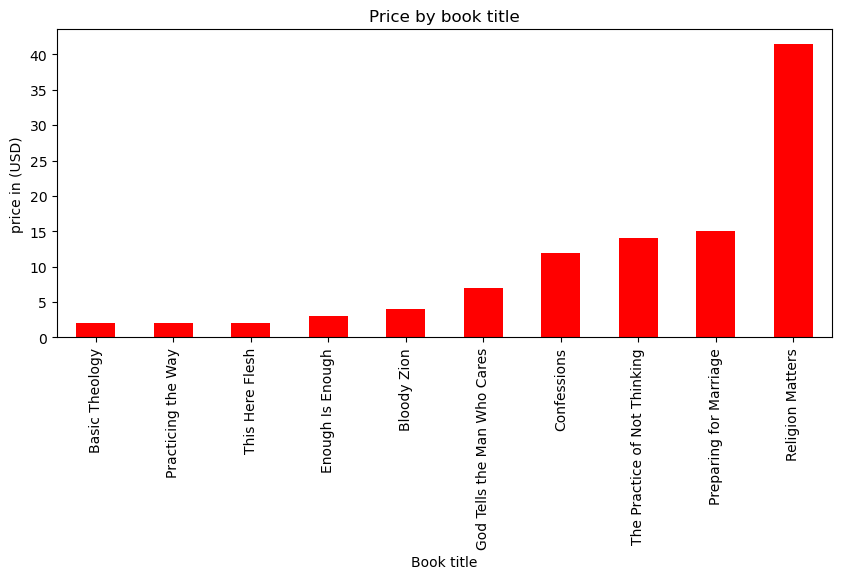

In [294]:
plt.figure(figsize=(10,4))
price_by_book.plot(kind='bar',color='red')
plt.xticks(rotation=90)
plt.ylabel('price in (USD)')
plt.xlabel('Book title')
plt.title('Price by book title')
plt.show()

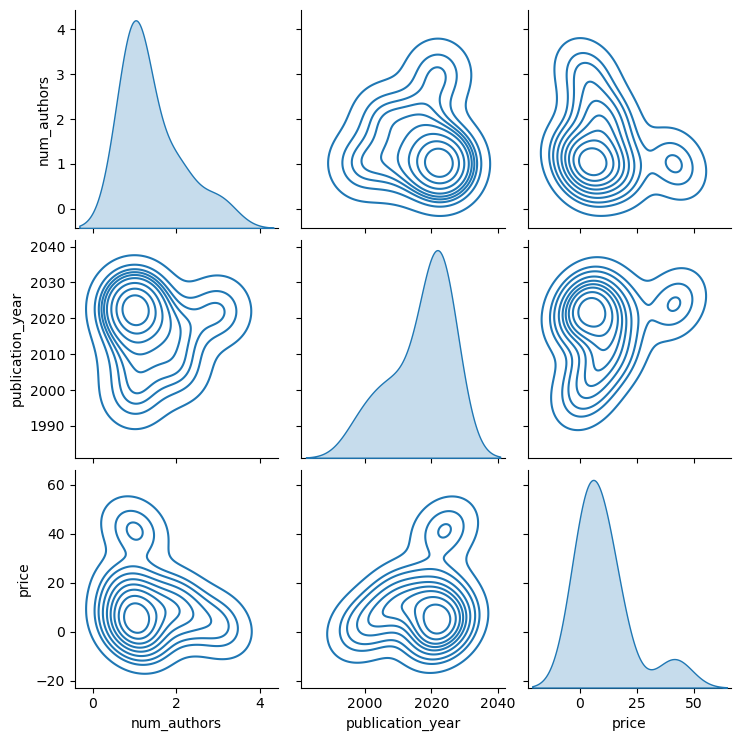

In [258]:
sns.pairplot(df,kind='kde')
plt.show()

In [332]:
publishers=df.groupby('publisher')['price'].mean().sort_values()

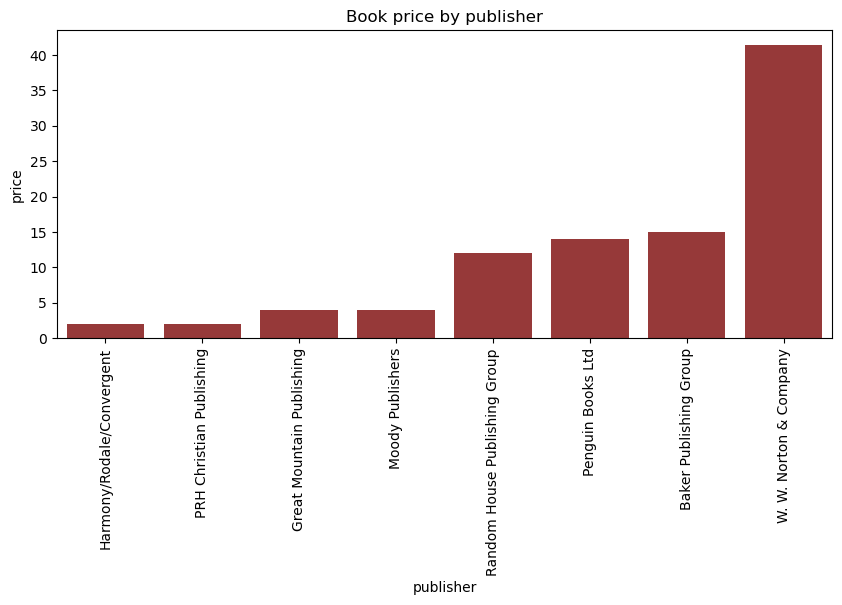

In [334]:
plt.figure(figsize=(10,4))
sns.barplot(publishers,color='brown')
plt.title('Book price by publisher')
plt.xticks(rotation=90)
plt.show()

In [261]:
num_authors=df.groupby('title')['num_authors'].mean().sort_values()

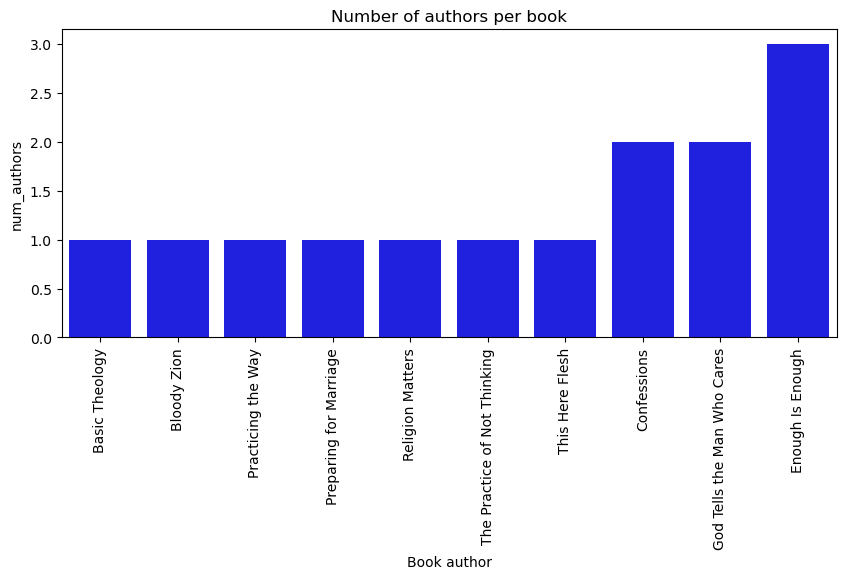

In [288]:
plt.figure(figsize=(10,4))
sns.barplot(num_authors,color='blue')
plt.title('Number of authors per book')
plt.xlabel('Book author')
plt.xticks(rotation=90)
plt.show()

In [263]:
grouped=df.groupby('publication_year')['price'].mean()

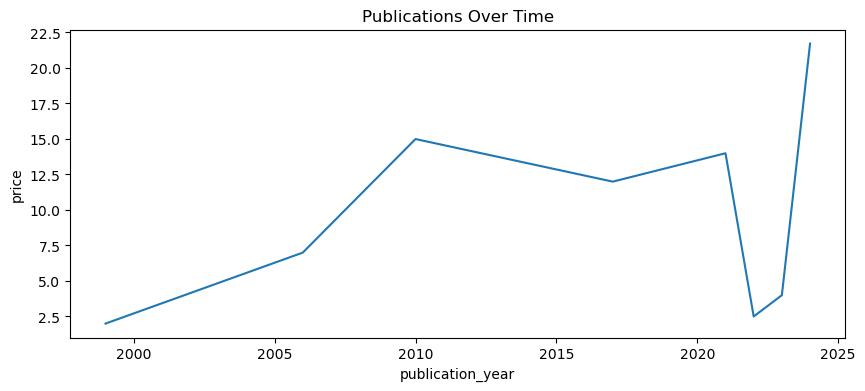

In [358]:
plt.figure(figsize=(10,4))
sns.lineplot(grouped)
plt.title('Publications Over Time')
plt.show()

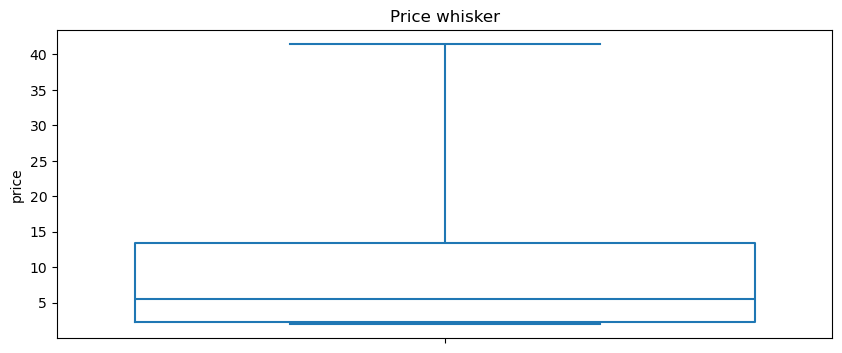

In [290]:
plt.figure(figsize=(10,4))
sns.boxplot(df['price'],whis=(0,100),fill=False,linewidth=1.5)
plt.title('Price whisker')
plt.show()